# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import spacy

nlp = spacy.load('en_core_web_md')

## Load Datasets

In [7]:
scripts_df = pd.read_csv('Data/Processed/scripts.csv')
episods_df = pd.read_csv('Data/Processed/episodes.csv')

## Ten Most Active Characters

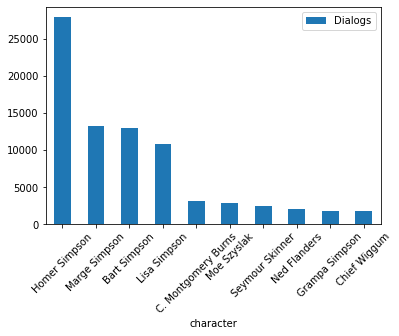

In [48]:
top_ten_active_characters = scripts_df.groupby(
    by = 'character',
    as_index = False
).count().sort_values(
    by = 'raw_text',
    ascending = False
).iloc[:10]

plot = top_ten_active_characters[['character', 'raw_text']].plot.bar(x = 'character', y = 'raw_text', label = 'Dialogs', rot = 45)
fig = plot.get_figure()
fig.savefig("Plots/top_ten_active_characters.png")